# State Student Spending Case Study
#### Examining any relationship between student sucess or lack thereof with how much money the state has invested


### Necessary Steps for Data Story
##### 1) Clean the Data 
    a. Import Data
    b. Transform variables
##### 2) Merge the Data
##### 3) Exploratory Data Analysis
    a. Visualize the data
##### 4) Preprocess and Train Data
##### 5) Create Machine Learning Model
##### 6) Summarize Findings

In [1]:
#import necessary modules

import pandas as pd
import numpy as np

# 1. Import Data

In [2]:
#import Graduation rate, Dropout rate, State Spending, Population, & State GDP data
Grad = pd.read_csv('Data/Completion1318edit.csv')
Drop = pd.read_csv('Data/Dropout1318edit.csv')
StateSpend = pd.read_excel('Data/StateSpendingStudents.xlsx')
Pop = pd.read_csv('Data/Pop10-19.csv')
GDP = pd.read_csv('Data/State Quarterly GDP 2005 - 2021 - Sheet1.csv')

In [3]:
#import tax data 
Tax13 = pd.read_csv('Data/2013 State Taxes.csv').replace('X', 0)
Tax14 = pd.read_csv('Data/2014 State Taxes.csv').replace('X', 0)
Tax15 = pd.read_csv('Data/2015 State Taxes.csv').replace('X', 0)
Tax16 = pd.read_csv('Data/2016 State Taxes.csv').replace('X', 0)
Tax17 = pd.read_csv('Data/2017 State Taxes.csv').replace('X', 0)
Tax18 = pd.read_csv('Data/2018 State Taxes.csv').replace('X', 0)
Tax19 = pd.read_csv('Data/2019 State Taxes.csv').replace('X', 0)


#Note to self to automate process:
#Try a dictionary. Start with empty dictionary. Wild cards to read itieratively * .csv

## Cleaning Tax Data

In [4]:
#Examing the column names: Need to change them to match the rest of the data
#Tax13.columns

In [5]:
#Dictionary to change state abbreviations to full state names
us_state_abbrev = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'District of Columbia': 'DC',
}

In [6]:
#Load all the individual tax files into one frame with an appropriate year varibable

TaxList = [Tax13, Tax14, Tax15, Tax16, Tax17, Tax18, Tax19]

TaxFile = pd.DataFrame()


initial_year = 2013
for loc_file in TaxList:
  loc_file = loc_file.iloc[:,1:]
  loc_file['Year'] = str(initial_year)
  loc_file = loc_file.melt(id_vars='Year', value_name = 'tax_all', var_name='State')
  TaxFile  = TaxFile.append(loc_file)
  initial_year = initial_year + 1

In [7]:
#Sum all the different types of tax categories
TaxFile['tax_all'] = TaxFile['tax_all'].astype('float')

AllTaxes = TaxFile.groupby(['State', 'Year'])['tax_all'].sum().reset_index()
AllTaxes.head()


,State,Year,tax_all
0,AK,2013,5132811.0
1,AK,2014,3392870.0
2,AK,2015,1363350.0
3,AK,2016,896921.0
4,AK,2017,1208929.0


In [8]:
#Fix the naming
AllTaxes['State'] = AllTaxes['State'].replace(us_state_abbrev)
AllTaxes.head()

,State,Year,tax_all
0,Alaska,2013,5132811.0
1,Alaska,2014,3392870.0
2,Alaska,2015,1363350.0
3,Alaska,2016,896921.0
4,Alaska,2017,1208929.0


## Cleaning Median Income Data

In [9]:
#Read in Median Income 
#(Deleted out Standard Deviation as well as repetitive information from original file)
MedianInc = pd.read_csv('Data/Median Income Edit.csv')

#Flip
MedianInc = MedianInc.melt(id_vars = 'State', var_name='Year', value_name = 'MedInc')

MedianInc.head()

,State,Year,MedInc
0,United States,2018,"63,179"
1,Alabama,2018,"49,936"
2,Alaska,2018,"68,734"
3,Arizona,2018,"62,283"
4,Arkansas,2018,"49,781"


In [10]:
Pop.dtypes

Geographic Area    object
Census             object
Estimates Base     object
2010               object
2011               object
2012               object
2013               object
2014               object
2015               object
2016               object
2017               object
2018               object
2019               object
dtype: object

## Cleaning Graduation and Drop Out Data

In [11]:
#examine data
print(Grad.columns)

Index(['State', '2012-2013', '2013-2014', '2014-2015', '2015-2016',
       '2016-2017', '2017-2018'],
      dtype='object')


In [12]:
#Rename columns so they match years in other files.
oldname = Grad.columns
newname = ['State', 2013, 2014, 2015, 2016, 2017, 2018 ]
Grad = Grad.rename(columns=dict(zip(oldname, newname)))

#Flip so States are columns
Grad = Grad.melt(id_vars = ['State'], var_name='Year', value_name = 'Graduates')


#Examine
Grad.head()

,State,Year,Graduates
0,United States,2013,81.4
1,Alabama,2013,80.0
2,Alaska,2013,71.8
3,Arizona,2013,75.1
4,Arkansas,2013,84.9


In [13]:
#Examine data
print(Drop.head())
print(Drop.columns)

           State  2013  2014  2015  2016  2017  2018
0  United States   6.8   6.3   6.0   5.8   5.4   5.3
1        Alabama   8.9   7.7   7.4   6.9   6.6   5.4
2         Alaska   6.2   2.8   8.8   5.6   5.3   4.4
3        Arizona   9.4   8.5   9.2   7.6   8.0   7.7
4       Arkansas   6.8   6.8   6.7   7.2   5.7   5.6
Index(['State', '2013', '2014', '2015', '2016', '2017', '2018'], dtype='object')


In [14]:
#Flip so States are columns
Drop = Drop.melt(id_vars = ['State'], var_name='Year', value_name = 'Dropout')

#Examine
Drop.head()

,State,Year,Dropout
0,United States,2013,6.8
1,Alabama,2013,8.9
2,Alaska,2013,6.2
3,Arizona,2013,9.4
4,Arkansas,2013,6.8


## Clean State Spending Data

In [15]:
#StateSpend.head() to examine data before cleaning

In [16]:
#Realign with States as columns
StateSpend.rename(columns = {'state': 'State'}, inplace = True)
StateSpend = StateSpend.melt(id_vars = ['State'], var_name='Year', value_name = 'StateSpend')
StateSpend.head()

#Examine
print(StateSpend.head())

        State  Year  StateSpend
0     Alabama  1997   3271969.0
1      Alaska  1997   1042311.0
2     Arizona  1997   3388165.0
3    Arkansas  1997   1960613.0
4  California  1997  28708364.0


## Clean Population Data

In [17]:
#Examine the Population
# print(Pop.head())

In [18]:
#Fix geographic area names & delete unnecessary strings

Pop = Pop.drop(columns = ['Census', 'Estimates Base']).iloc[:58,]
Pop['Geographic Area'] = Pop['Geographic Area'].str.replace('.','')


# Combine and examine
Pop = Pop.melt(id_vars = 'Geographic Area',var_name='Year',value_name = 'Population')
Pop.tail()

,Geographic Area,Year,Population
555,Virginia,2019,"8,535,519"
556,Washington,2019,"7,614,893"
557,West Virginia,2019,"1,792,147"
558,Wisconsin,2019,"5,822,434"
559,Wyoming,2019,"578,759"


In [19]:
#Change column name to match other datasets
Pop = Pop.rename(columns={'Geographic Area' : 'State'})
Pop.head()

,State,Year,Population
0,United States,2010,"309,321,666"
1,Northeast,2010,"55,380,134"
2,Midwest,2010,"66,974,416"
3,South,2010,"114,866,680"
4,West,2010,"72,100,436"


In [20]:
Pop['Population'] = Pop['Population'].replace(" ' '", '')
Pop.head()

,State,Year,Population
0,United States,2010,"309,321,666"
1,Northeast,2010,"55,380,134"
2,Midwest,2010,"66,974,416"
3,South,2010,"114,866,680"
4,West,2010,"72,100,436"


In [21]:
#Remove commas from ints

for x in range(len(Pop)):
    Pop['Population'][x] = Pop['Population'][x].replace(',' , '')

In [22]:
Pop.head()

,State,Year,Population
0,United States,2010,309321666
1,Northeast,2010,55380134
2,Midwest,2010,66974416
3,South,2010,114866680
4,West,2010,72100436


## Clean GDP  Data

In [23]:
#Examine GDP data before edits
# GDP.head()

In [24]:
# In order to average the GDP by year we need to extract the year
GDP['Year'] = GDP['DATE'].str[:4]
GDP.drop(columns = 'DATE', inplace = True)
GDP.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
0,153077.8,37393.9,219879.5,87648.2,1071327.2,215960.0,205563.8,50938.8,84367.6,679535.2,...,224177.7,959728.9,90791.3,23305.0,351558.7,289799.4,51590.1,222355.1,25403.1,2005
1,155409.9,38641.2,225374.3,88484.4,1147944.3,218742.0,207535.4,49992.1,85216.8,688958.5,...,225712.9,966652.1,92408.8,23288.1,358082.4,294263.7,52859.3,224122.0,26571.8,2005
2,156809.7,40259.9,232290.1,89890.7,1247734.4,222965.7,208749.0,50351.7,85499.3,708198.9,...,229952.8,993026.3,95362.0,23560.3,365491.2,295654.5,53610.3,228348.1,27453.0,2005
3,160315.8,42859.7,235386.5,92549.3,1366166.5,223561.9,212795.6,56830.1,86313.2,712347.7,...,232661.9,1025403.5,98650.0,23850.2,368236.9,303717.2,55111.1,227537.6,29448.8,2005
4,161732.8,42664.7,242418.5,92836.0,1387551.8,228594.0,221184.4,54220.3,87757.7,732154.4,...,236210.0,1054437.0,102069.5,24289.8,375995.3,310466.5,55639.7,232585.7,30455.1,2006


In [25]:
#Melt it down 
GDP = GDP.melt(id_vars = ['Year'], var_name='State', value_name = 'GDP')
GDP.head()

,Year,State,GDP
0,2005,Alabama,153077.8
1,2005,Alabama,155409.9
2,2005,Alabama,156809.7
3,2005,Alabama,160315.8
4,2006,Alabama,161732.8


In [26]:
#Find the average yearly GDP
YearlyGDP = GDP.groupby(['State', 'Year'])['GDP'].mean().reset_index()

In [27]:
YearlyGDP.head()

,State,Year,GDP
0,Alabama,2005,156403.30
1,Alabama,2006,164347.85
2,Alabama,2007,170263.85
3,Alabama,2008,172677.25
4,Alabama,2009,169128.50


## Clean Unemployment Rates

In [28]:
# Empty data frame
Unemployment = pd.DataFrame()


for i in np.arange(2009,2018,1):
    print("Reading: {}".format(str(i)))
    
    year_data = pd.read_excel('Data/UnemploymentRateData_Parsed.xlsx', sheet_name = str(i))
    melt_data = pd.melt(year_data, id_vars = 'State', var_name = ['Month'], value_name = 'value')

    aggregated_data = melt_data.groupby('State').agg({'value' : ['min', 'max', 'mean']}).reset_index()
    aggregated_data.columns = ['State', 'min_unemploymentRate', 'max_unemploymentRate', 'mean_unemploymentRate']
    aggregated_data['Year'] = str(i)
    
    # Logic to add each years data to the end of previously created data
    Unemployment = Unemployment.append(aggregated_data)

Unemployment.head()

Reading: 2009
Reading: 2010
Reading: 2011
Reading: 2012
Reading: 2013
Reading: 2014
Reading: 2015
Reading: 2016
Reading: 2017


,State,min_unemploymentRate,max_unemploymentRate,mean_unemploymentRate,Year
0,Alabama,7.8,11.0,9.816667,2009
1,Alaska,7.9,8.9,8.383333,2009
2,Arizona,7.0,9.3,8.458333,2009
3,Arkansas,6.4,7.7,7.041667,2009
4,California,10.1,12.5,11.616667,2009


# 2. Merge the Clean Files

In [29]:
MedianInc['Year']

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
1815    1984
1816    1984
1817    1984
1818    1984
1819    1984
Name: Year, Length: 1820, dtype: object

In [30]:
Grad['Year'] = Grad['Year'].astype('str')
Grad['State'] = Grad['State'].astype('str')

Drop['Year'] = Drop['Year'].astype('str')
Drop['State'] = Drop['State'].astype('str')

StateSpend['Year'] = StateSpend['Year'].astype('str')
StateSpend['State'] = StateSpend['State'].astype('str')

#Pop['Population'] = Pop['Population'].astype('Float64')

MedianInc['Year'] = MedianInc['Year'].astype('str')
MedianInc['State'] = MedianInc['State'].astype('str')
#MedianInc['MedInc'] = MedianInc['MedInc'].astype('Float64')

In [31]:
#merge graduate and drop data
grad_drop_merge = Grad.merge(Drop, on = ['Year', 'State'], how = 'left')
grad_drop_merge.head()

,State,Year,Graduates,Dropout
0,United States,2013,81.4,6.8
1,Alabama,2013,80.0,8.9
2,Alaska,2013,71.8,6.2
3,Arizona,2013,75.1,9.4
4,Arkansas,2013,84.9,6.8


In [32]:
#Merge state spending data
all_spend_merge = grad_drop_merge.merge(StateSpend, on = ['Year', 'State'], how = 'left')
all_spend_merge.head()

,State,Year,Graduates,Dropout,StateSpend
0,United States,2013,81.4,6.8,NaN
1,Alabama,2013,80.0,8.9,6461916.0
2,Alaska,2013,71.8,6.2,2202551.0
3,Arizona,2013,75.1,9.4,6675200.0
4,Arkansas,2013,84.9,6.8,4222408.0


In [33]:
# Merge in population
all_pop_merge = all_spend_merge.merge(Pop, on = ['Year', 'State'], how = 'left')
all_pop_merge.head()

,State,Year,Graduates,Dropout,StateSpend,Population
0,United States,2013,81.4,6.8,NaN,315993715
1,Alabama,2013,80.0,8.9,6461916.0,4830081
2,Alaska,2013,71.8,6.2,2202551.0,737068
3,Arizona,2013,75.1,9.4,6675200.0,6632764
4,Arkansas,2013,84.9,6.8,4222408.0,2959400


In [34]:
#Merge in Taxes
all_tax_merge = all_pop_merge.merge(AllTaxes, on = ['Year', 'State'], how = 'left')
all_tax_merge.head()

,State,Year,Graduates,Dropout,StateSpend,Population,tax_all
0,United States,2013,81.4,6.8,NaN,315993715,NaN
1,Alabama,2013,80.0,8.9,6461916.0,4830081,9270919.0
2,Alaska,2013,71.8,6.2,2202551.0,737068,5132811.0
3,Arizona,2013,75.1,9.4,6675200.0,6632764,13796918.0
4,Arkansas,2013,84.9,6.8,4222408.0,2959400,8586767.0


In [35]:
#Merge in Median Income
all_median_merge = all_tax_merge.merge(MedianInc, on = ['Year', 'State'], how = 'left')
all_median_merge.head()

,State,Year,Graduates,Dropout,StateSpend,Population,tax_all,MedInc
0,United States,2013,81.4,6.8,NaN,315993715,NaN,"53,585"
1,Alabama,2013,80.0,8.9,6461916.0,4830081,9270919.0,"47,320"
2,Alaska,2013,71.8,6.2,2202551.0,737068,5132811.0,"72,472"
3,Arizona,2013,75.1,9.4,6675200.0,6632764,13796918.0,"52,611"
4,Arkansas,2013,84.9,6.8,4222408.0,2959400,8586767.0,"39,376"


In [36]:
all_median_merge.head()

,State,Year,Graduates,Dropout,StateSpend,Population,tax_all,MedInc
0,United States,2013,81.4,6.8,NaN,315993715,NaN,"53,585"
1,Alabama,2013,80.0,8.9,6461916.0,4830081,9270919.0,"47,320"
2,Alaska,2013,71.8,6.2,2202551.0,737068,5132811.0,"72,472"
3,Arizona,2013,75.1,9.4,6675200.0,6632764,13796918.0,"52,611"
4,Arkansas,2013,84.9,6.8,4222408.0,2959400,8586767.0,"39,376"


In [37]:
#Merge in GDP
all_gdp_merge = all_median_merge.merge(YearlyGDP, on = ['Year', 'State'], how = 'left')
all_gdp_merge.head()

,State,Year,Graduates,Dropout,StateSpend,Population,tax_all,MedInc,GDP
0,United States,2013,81.4,6.8,NaN,315993715,NaN,"53,585",NaN
1,Alabama,2013,80.0,8.9,6461916.0,4830081,9270919.0,"47,320",192166.525
2,Alaska,2013,71.8,6.2,2202551.0,737068,5132811.0,"72,472",56625.250
3,Arizona,2013,75.1,9.4,6675200.0,6632764,13796918.0,"52,611",275007.525
4,Arkansas,2013,84.9,6.8,4222408.0,2959400,8586767.0,"39,376",112764.575


In [38]:
#Merge in Unemployment
all_merge = all_gdp_merge.merge(Unemployment, on = ['Year', 'State'], how = 'left')
all_merge.head()

,State,Year,Graduates,Dropout,StateSpend,Population,tax_all,MedInc,GDP,min_unemploymentRate,max_unemploymentRate,mean_unemploymentRate
0,United States,2013,81.4,6.8,NaN,315993715,NaN,"53,585",NaN,NaN,NaN,NaN
1,Alabama,2013,80.0,8.9,6461916.0,4830081,9270919.0,"47,320",192166.525,6.1,7.2,6.608333
2,Alaska,2013,71.8,6.2,2202551.0,737068,5132811.0,"72,472",56625.250,5.9,6.7,6.333333
3,Arizona,2013,75.1,9.4,6675200.0,6632764,13796918.0,"52,611",275007.525,7.6,8.3,7.975000
4,Arkansas,2013,84.9,6.8,4222408.0,2959400,8586767.0,"39,376",112764.575,7.1,7.5,7.325000


In [39]:
all_merge['Year'] = all_merge['Year'].astype('int64') 
all_merge['Dropout'] = all_merge['Dropout'].astype('float64') 
all_merge['Population'] = all_merge['Population'].astype('float64') 
all_merge.dtypes

State                     object
Year                       int64
Graduates                float64
Dropout                  float64
StateSpend               float64
Population               float64
tax_all                  float64
MedInc                    object
GDP                      float64
min_unemploymentRate     float64
max_unemploymentRate     float64
mean_unemploymentRate    float64
dtype: object

## Clean and narrow entire data frame for research
The primary focus of this study will be on years 2013 - 2016

In [40]:
#Focus on keyYears greater than 2013
keyYears = all_merge[all_merge['Year'] >= 2013]

#Focus on keyYears less than 2016
keyYears = keyYears[keyYears['Year'] <= 2016]

In [41]:
#Remove Washington DC & United States
keyYears = keyYears[keyYears['State'] != 'District of Columbia']
keyYears = keyYears[keyYears['State'] != 'United States']

In [42]:
print('The Number of State Identifiers:', keyYears.State.nunique())
print('As follows:', keyYears.State.unique())


The Number of State Identifiers: 50
As follows: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [43]:
print('The Number of Years Examined :', keyYears.Year.nunique())
print('As follows:', keyYears.Year.unique())

The Number of Years Examined : 4
As follows: [2013 2014 2015 2016]


In [44]:
print(keyYears.isnull().sum())

State                    0
Year                     0
Graduates                1
Dropout                  0
StateSpend               0
Population               0
tax_all                  2
MedInc                   0
GDP                      0
min_unemploymentRate     0
max_unemploymentRate     0
mean_unemploymentRate    0
dtype: int64


In [45]:
keyYears[keyYears.tax_all.isnull()]

,State,Year,Graduates,Dropout,StateSpend,Population,tax_all,MedInc,GDP,min_unemploymentRate,max_unemploymentRate,mean_unemploymentRate
118,Illinois,2015,85.6,5.1,23713992.0,12858913.0,NaN,"60,413",795326.125,5.4,6.1,5.816667
120,Iowa,2015,90.8,4.6,5381831.0,3120960.0,NaN,"60,855",179459.200,3.4,4.2,3.750000


In [46]:
#The source of the data (https://www.census.gov/data/datasets/2015/econ/stc/2015-annual.html)
#Did not have Illinois and Iowa so we will add the average of their taxes in prior years

IllinoisAvg = keyYears[keyYears['State'] == 'Illinois']['tax_all'].mean()
IowaAvg = keyYears[keyYears['State'] == 'Iowa']['tax_all'].mean()


In [47]:
#The source of the data (https://www.census.gov/data/datasets/2015/econ/stc/2015-annual.html)
#Did not have Illinois and Iowa so we will add the average of their taxes in prior years
keyYears.loc[(keyYears['State'] == 'Illinois') & (keyYears['tax_all'].isnull()), 'tax_all'] = keyYears[keyYears['State'] == 'Illinois']['tax_all'].mean()


keyYears.loc[(keyYears['State'] == 'Iowa') & (keyYears['tax_all'].isnull()), 'tax_all'] = keyYears[keyYears['State'] == 'Iowa']['tax_all'].mean()

In [48]:
keyYears[keyYears.Graduates.isnull()]

,State,Year,Graduates,Dropout,StateSpend,Population,tax_all,MedInc,GDP,min_unemploymentRate,max_unemploymentRate,mean_unemploymentRate
13,Idaho,2013,NaN,7.2,1814272.0,1611206.0,3578068.0,"48,467",61155.175,5.7,6.8,6.341667


In [49]:
# The rate was not provided by our source 
# https://www.ojjdp.gov/ojstatbb/population/qa01502.asp?qaDate=2018&text=no&maplink=link1
# We will replace the NaN with the average

keyYears.loc[(keyYears['State'] == 'Idaho') & (keyYears['Graduates'].isnull()), 'Graduates'] = keyYears[keyYears['State'] == 'Idaho']['Graduates'].mean()

In [50]:
#Check that NaN are resolved
#print(keyYears.isnull().sum())

In [51]:
keyYears.head()

,State,Year,Graduates,Dropout,StateSpend,Population,tax_all,MedInc,GDP,min_unemploymentRate,max_unemploymentRate,mean_unemploymentRate
1,Alabama,2013,80.0,8.9,6461916.0,4830081.0,9270919.0,"47,320",192166.525,6.1,7.2,6.608333
2,Alaska,2013,71.8,6.2,2202551.0,737068.0,5132811.0,"72,472",56625.250,5.9,6.7,6.333333
3,Arizona,2013,75.1,9.4,6675200.0,6632764.0,13796918.0,"52,611",275007.525,7.6,8.3,7.975000
4,Arkansas,2013,84.9,6.8,4222408.0,2959400.0,8586767.0,"39,376",112764.575,7.1,7.5,7.325000
5,California,2013,80.4,6.8,57043384.0,38260787.0,133184246.0,"60,794",2179228.975,8.3,9.8,8.891667


In [71]:
#Add in how much every state spends per person on education
keyYears['SpendPerCapita'] = keyYears['StateSpend']/keyYears['Population']
keyYears.head()

,State,Year,Graduates,Dropout,StateSpend,Population,tax_all,MedInc,GDP,min_unemploymentRate,max_unemploymentRate,mean_unemploymentRate,SpendPerCaptia,US_Avg_Grad,US_Avg_Drop,US_Avg_Tax,US_Avg_Unemployment,US_Avg_SPC,SpendPerCapita
0,Alabama,2013,80.0,8.9,6461916.0,4830081.0,9270919.0,"47,320",192166.525,6.1,7.2,6.608333,1.337848,81.416667,6.596,16983032.64,6.773333,1.612556,1.337848
1,Alaska,2013,71.8,6.2,2202551.0,737068.0,5132811.0,"72,472",56625.250,5.9,6.7,6.333333,2.988260,81.416667,6.596,16983032.64,6.773333,1.612556,2.988260
2,Arizona,2013,75.1,9.4,6675200.0,6632764.0,13796918.0,"52,611",275007.525,7.6,8.3,7.975000,1.006398,81.416667,6.596,16983032.64,6.773333,1.612556,1.006398
3,Arkansas,2013,84.9,6.8,4222408.0,2959400.0,8586767.0,"39,376",112764.575,7.1,7.5,7.325000,1.426778,81.416667,6.596,16983032.64,6.773333,1.612556,1.426778
4,California,2013,80.4,6.8,57043384.0,38260787.0,133184246.0,"60,794",2179228.975,8.3,9.8,8.891667,1.490910,81.416667,6.596,16983032.64,6.773333,1.612556,1.490910


In [72]:
# Add in US Averages for comparision 
# Create Data Frames with the new averages
# Rename Columns so they're distinct from our primary Data Frame

#Average Graduation
US_Avg_Grad = pd.DataFrame(keyYears.groupby('Year')['Graduates'].mean()).reset_index()
US_Avg_Grad = US_Avg_Grad.rename(columns = {'Graduates': 'US_Avg_Grad'})

#Average Drop Out
US_Avg_Drop = pd.DataFrame(keyYears.groupby('Year')['Dropout'].mean()).reset_index()
US_Avg_Drop = US_Avg_Drop.rename(columns = {'Dropout': 'US_Avg_Drop'})

#Average Tax Income
US_Avg_Tax = pd.DataFrame(keyYears.groupby('Year')['tax_all'].mean()).reset_index()
US_Avg_Tax = US_Avg_Tax.rename(columns = {'tax_all': 'US_Avg_Tax'})


#Average Unemployment
US_Avg_Unemployment = pd.DataFrame(keyYears.groupby('Year')['mean_unemploymentRate'].mean()).reset_index()
US_Avg_Unemployment = US_Avg_Unemployment.rename(columns = {'mean_unemploymentRate': 'US_Avg_Unemployment'})

#Average State Spend Per Captia
US_Avg_SPC = pd.DataFrame(keyYears.groupby('Year')['SpendPerCapita'].mean()).reset_index()
US_Avg_SPC = US_Avg_SPC.rename(columns = {'SpendPerCapita': 'US_Avg_SPC'})


In [73]:
#Merge with the keyYear frame
keyYears = keyYears.merge(US_Avg_Grad, on = ['Year'], how = 'left')
keyYears = keyYears.merge(US_Avg_Drop, on = ['Year'], how = 'left')
keyYears = keyYears.merge(US_Avg_Tax, on = ['Year'], how = 'left')
keyYears = keyYears.merge(US_Avg_Unemployment, on = ['Year'], how = 'left')
keyYears = keyYears.merge(US_Avg_SPC, on = ['Year'], how = 'left')

In [55]:
keyYears.head()

,State,Year,Graduates,Dropout,StateSpend,Population,tax_all,MedInc,GDP,min_unemploymentRate,max_unemploymentRate,mean_unemploymentRate,SpendPerCaptia,US_Avg_Grad,US_Avg_Drop,US_Avg_Tax,US_Avg_Unemployment,US_Avg_SPC
0,Alabama,2013,80.0,8.9,6461916.0,4830081.0,9270919.0,"47,320",192166.525,6.1,7.2,6.608333,1.337848,81.416667,6.596,16983032.64,6.773333,1.612556
1,Alaska,2013,71.8,6.2,2202551.0,737068.0,5132811.0,"72,472",56625.250,5.9,6.7,6.333333,2.988260,81.416667,6.596,16983032.64,6.773333,1.612556
2,Arizona,2013,75.1,9.4,6675200.0,6632764.0,13796918.0,"52,611",275007.525,7.6,8.3,7.975000,1.006398,81.416667,6.596,16983032.64,6.773333,1.612556
3,Arkansas,2013,84.9,6.8,4222408.0,2959400.0,8586767.0,"39,376",112764.575,7.1,7.5,7.325000,1.426778,81.416667,6.596,16983032.64,6.773333,1.612556
4,California,2013,80.4,6.8,57043384.0,38260787.0,133184246.0,"60,794",2179228.975,8.3,9.8,8.891667,1.490910,81.416667,6.596,16983032.64,6.773333,1.612556


# Begin Exploratory Data Analysis

Before visualization lets explore the highest achieving and lowest achieving states according to the parameters of dropout rates and graduation rates.

In [68]:
keyYears.groupby('State')['Graduates'].mean().sort_values(ascending = False).head()

State
Iowa          90.575
Nebraska      89.100
New Jersey    88.975
Texas         88.600
Wisconsin     88.300
Name: Graduates, dtype: float64

In [69]:
keyYears.groupby('State')['Dropout'].mean().sort_values(ascending = False).head()

State
Louisiana     9.950
Nevada        9.400
New Mexico    8.800
Arizona       8.675
Oklahoma      8.275
Name: Dropout, dtype: float64

In [74]:
keyYears.groupby('State')['SpendPerCapita'].mean().sort_values(ascending = False).head()

State
Alaska        2.985331
New York      2.884472
New Jersey    2.706972
Wyoming       2.534996
Vermont       2.381038
Name: SpendPerCapita, dtype: float64

Initally we see one overlap between a state with a high graduation rate and the amount spent on students per capita. This gives a reference baseline to look at before the rest of our exploration. One observation is that looking at cost of living might also be interesting since the spend per capita does have states that have high cost of living.

In [75]:
import numpy as np
from plotnine import *

/Users/shayleedavis/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


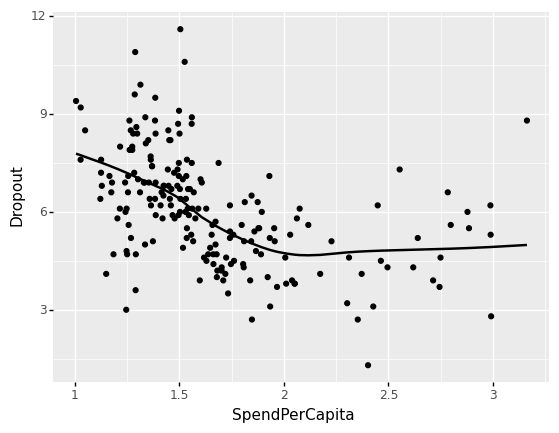

<ggplot: (8794085768976)>

In [83]:
ggplot(keyYears, aes(x = 'SpendPerCapita', y = 'Dropout')) + geom_point(stat = 'identity') + stat_smooth()

/Users/shayleedavis/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


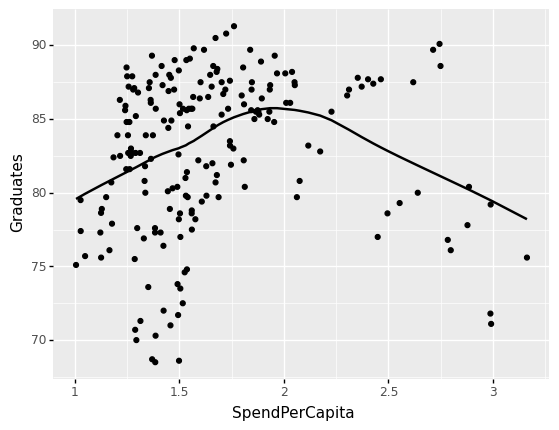

<ggplot: (8794085939315)>

In [84]:
ggplot(keyYears, aes(x = 'SpendPerCapita', y = 'Graduates')) + geom_point(stat = 'identity') + stat_smooth()


We cannot easily see a linear correlation between the spend per capita and the graduation/dropout rates. Which means the amount spent might be too skewed by other factors such as cost of living.

/Users/shayleedavis/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


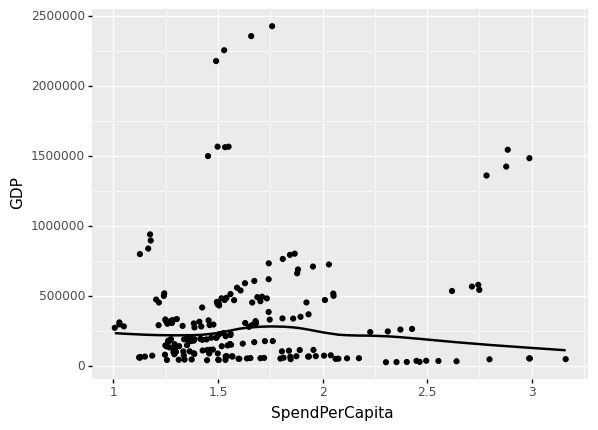

<ggplot: (8794069503004)>

In [90]:
ggplot(keyYears, aes(x = 'SpendPerCapita', y = 'GDP')) + geom_point(stat = 'identity') + stat_smooth()

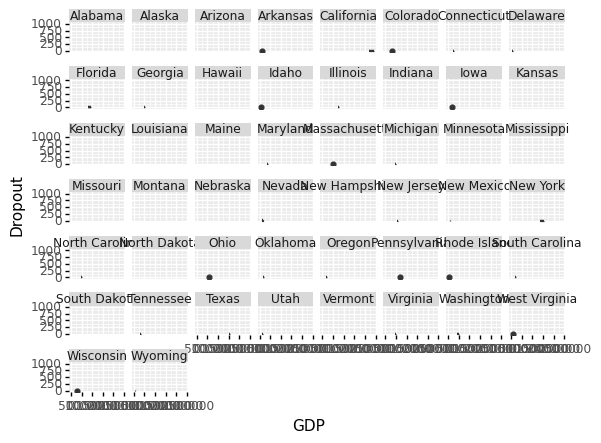

<ggplot: (8794069370272)>

In [91]:
ggplot(keyYears, aes(x = 'GDP', y = 'Dropout')) + geom_boxplot() + scale_y_continuous(limits = (0,1000)) + facet_wrap('State')

# 4) Preprocess and Train Data